In [326]:
## import necessary libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [327]:
## import the data 
data = pd.read_csv("heart_failure.csv.xls")

In [328]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [330]:
## double check for null values 
## data type is all ok 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [331]:
## are there any duplicated rows?
data.duplicated().keep=False

<function matplotlib.pyplot.show(close=None, block=None)>

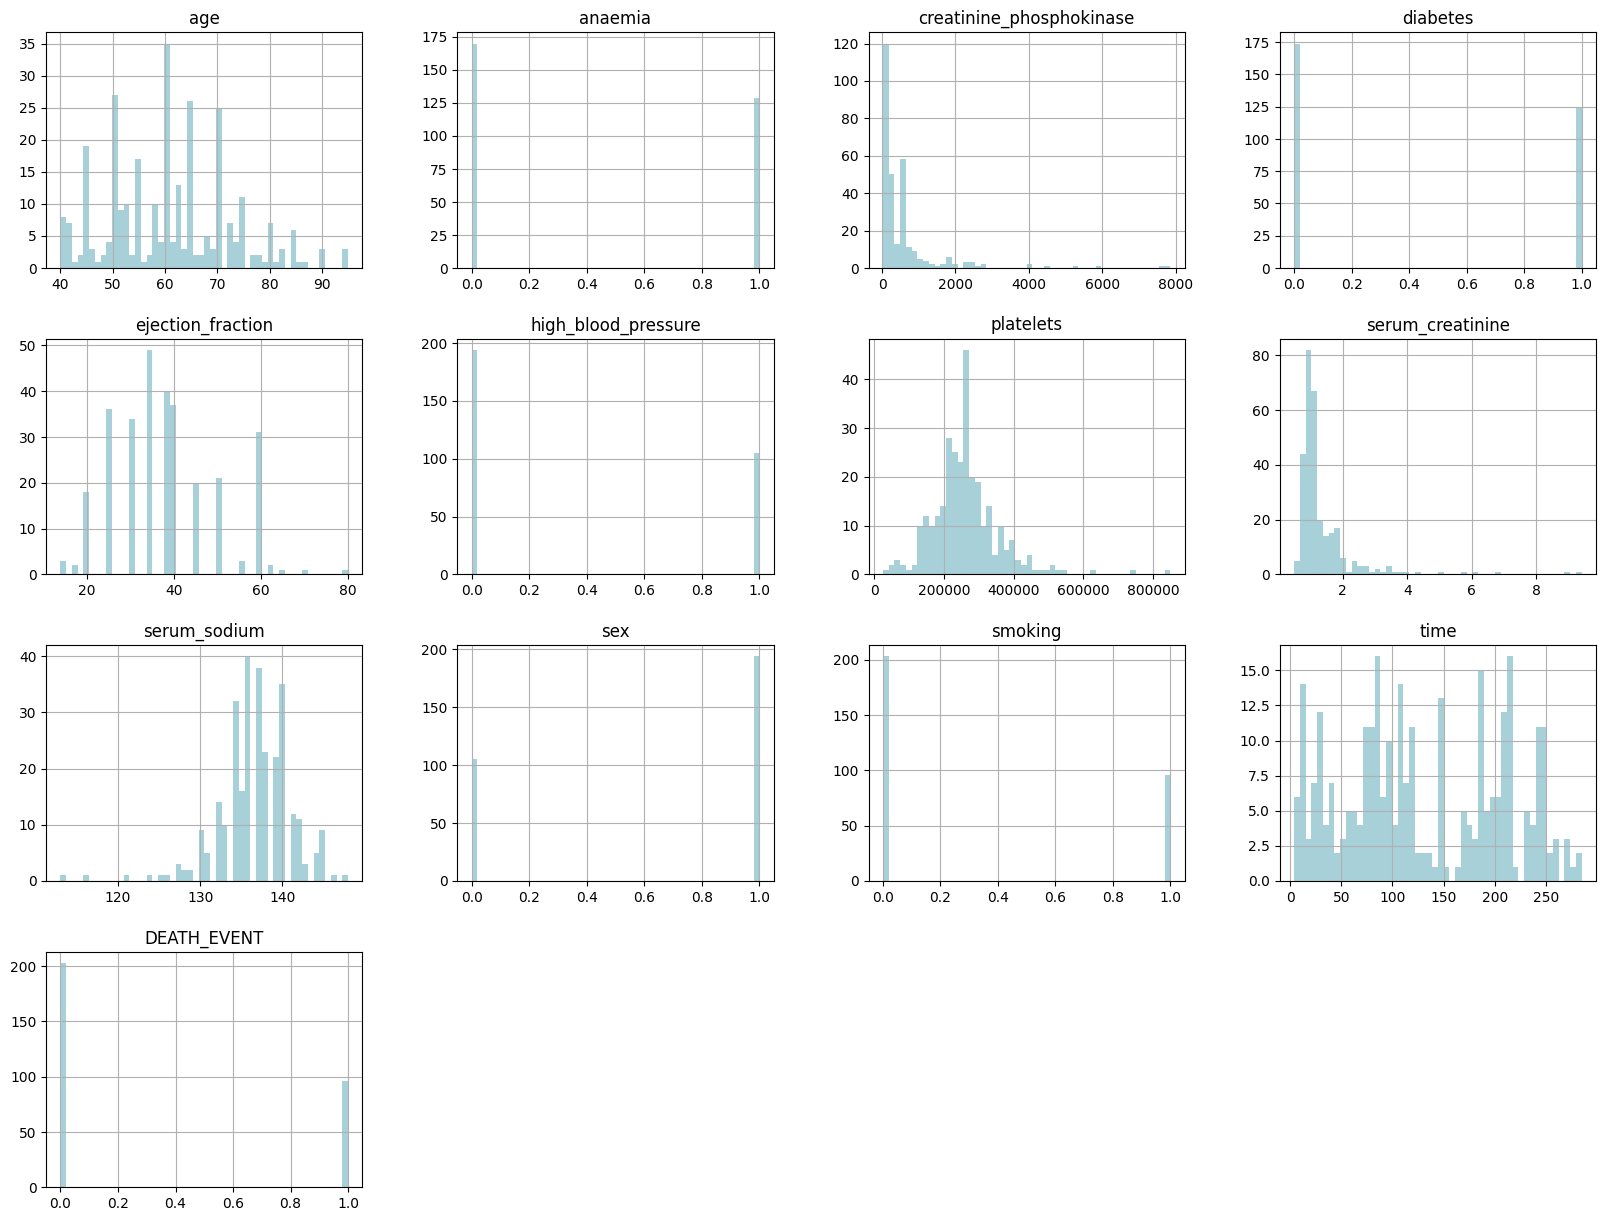

In [332]:
## skew of data 
data.hist(bins=50, figsize=(20, 15), color = "#A7D0D9")
plt.show

In [333]:
## removing and replacing outliers
for x in ["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]:
    q75, q25 = np.percentile(data.loc[:,x], [75,25])
    intr_qr = q75 - q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
data.loc[data[x] < min,x] = np.nan
data.loc[data[x] > max,x] = np.nan

In [334]:
## replacing the null values creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine 
data["creatinine_phosphokinase"].fillna(data["creatinine_phosphokinase"].median(), inplace=True)
data["ejection_fraction"].fillna(data["ejection_fraction"].median(),inplace = True)
data["platelets"].fillna(data["platelets"].median(),inplace = True)
data["serum_creatinine"].fillna(data["serum_creatinine"].median(),inplace = True)
data["serum_sodium"].fillna(data["serum_sodium"].median(),inplace = True)

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.5 KB


In [336]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [337]:
data.shape

(299, 13)

In [338]:
## checking no outliers left
columns = data.iloc[:, :]
# Iterate over each column and remove outliers
for column in columns:
    max_threshold, min_threshold = data[column].quantile([0.75, 0.25])
    new_df = data[(data[column] > min_threshold) & (data[column] < max_threshold)]
    # Update the original DataFrame with the new values
    df = new_df.copy()
# Print the updated DataFrame
print(df)


Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


<Axes: >

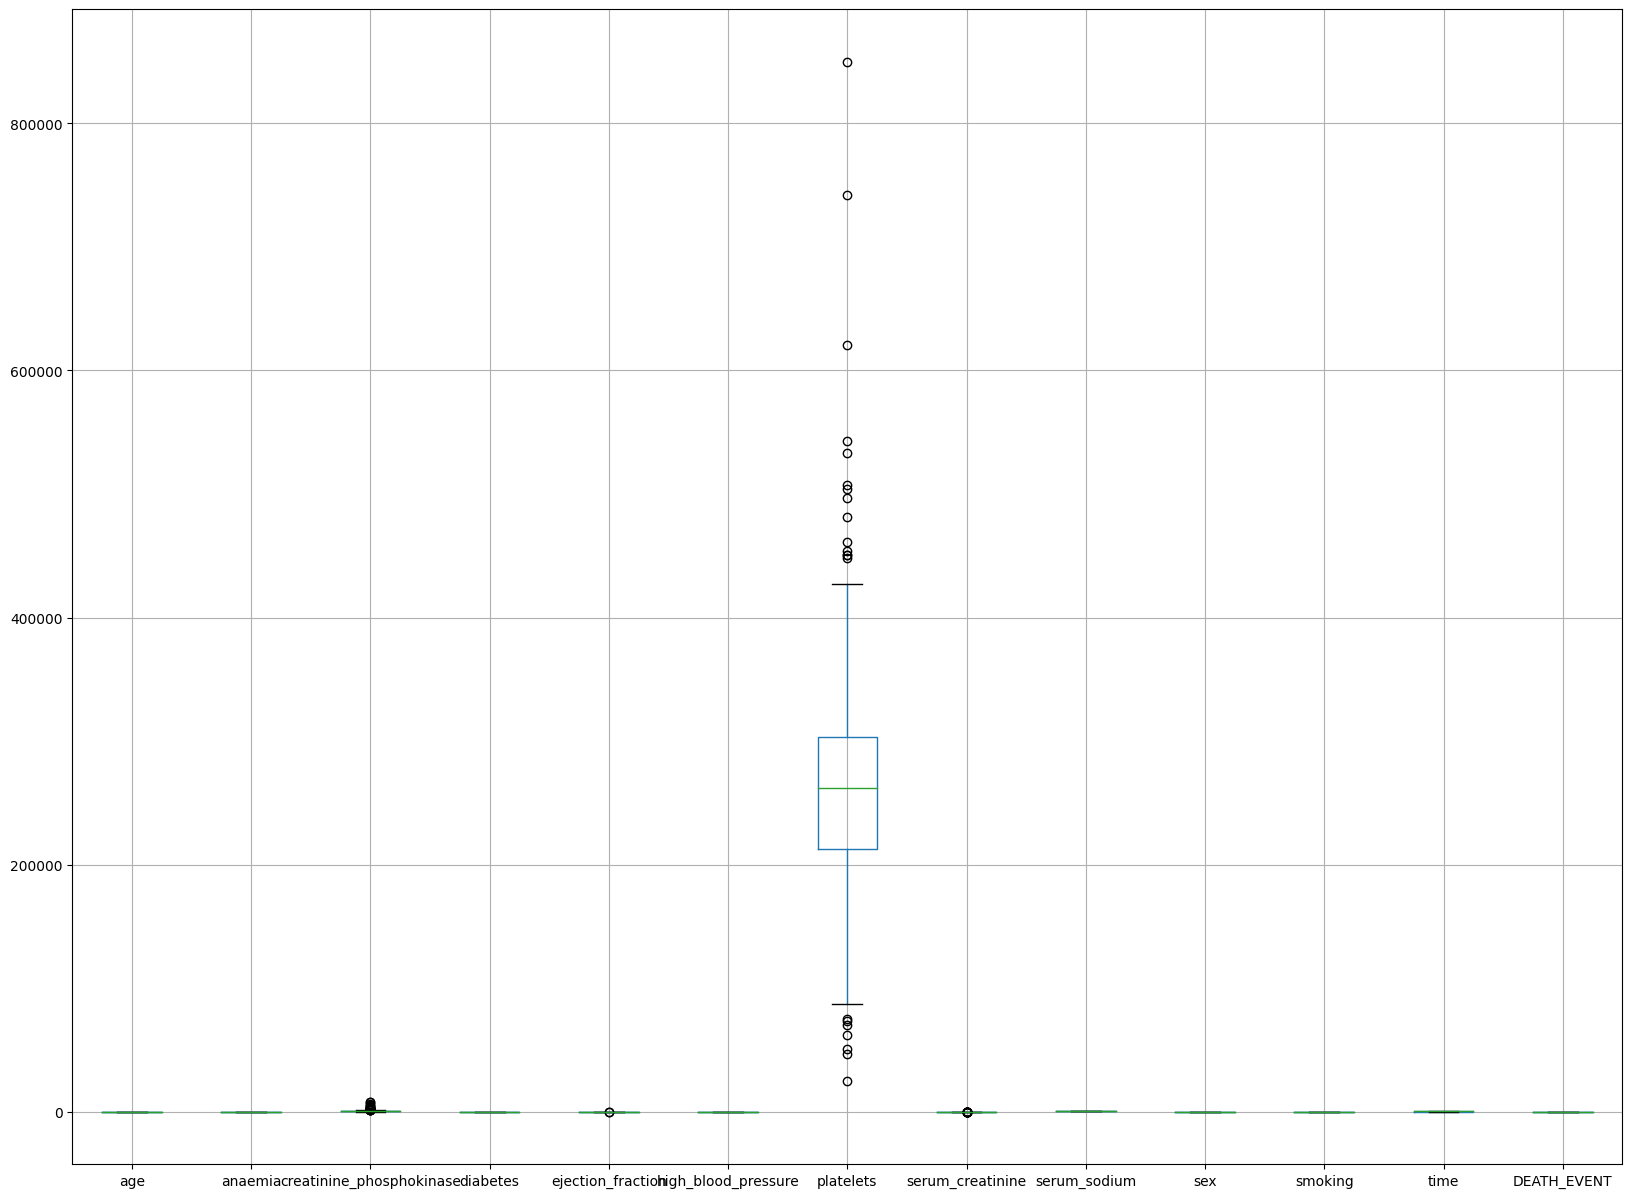

In [339]:
data.boxplot(figsize = (20,15))

In [340]:
## how many of the dataset died?
## imbalanced data 
data["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [341]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.872910,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,3.841303,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

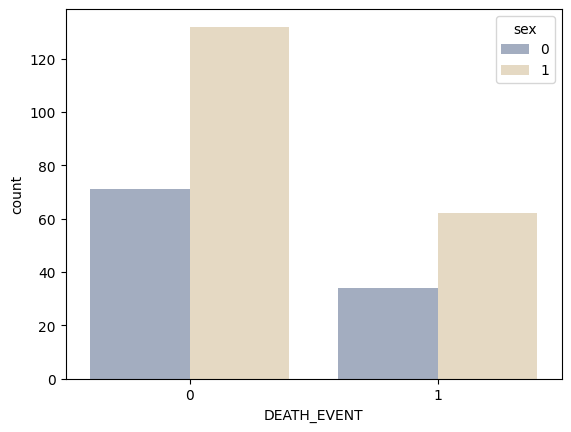

In [342]:
#How many people survived by sex?
colour = ["#9EABC5", "#EBDBBD"]
sns.countplot(x="DEATH_EVENT", hue="sex", data=data, palette=colour)

In [343]:
corr = data.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.077089,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.057043,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.069183,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.026723,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.168311,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.018900,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.058983,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.171230,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.077089,0.057043,0.069183,-0.026723,0.168311,0.018900,0.058983,-0.171230,1.000000,-0.075539,0.005979,0.061645,-0.175212
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.075539,1.000000,0.445892,-0.015608,-0.004316


In [344]:
## making it easier to see the features correlated with dying or not
corr["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.175212
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

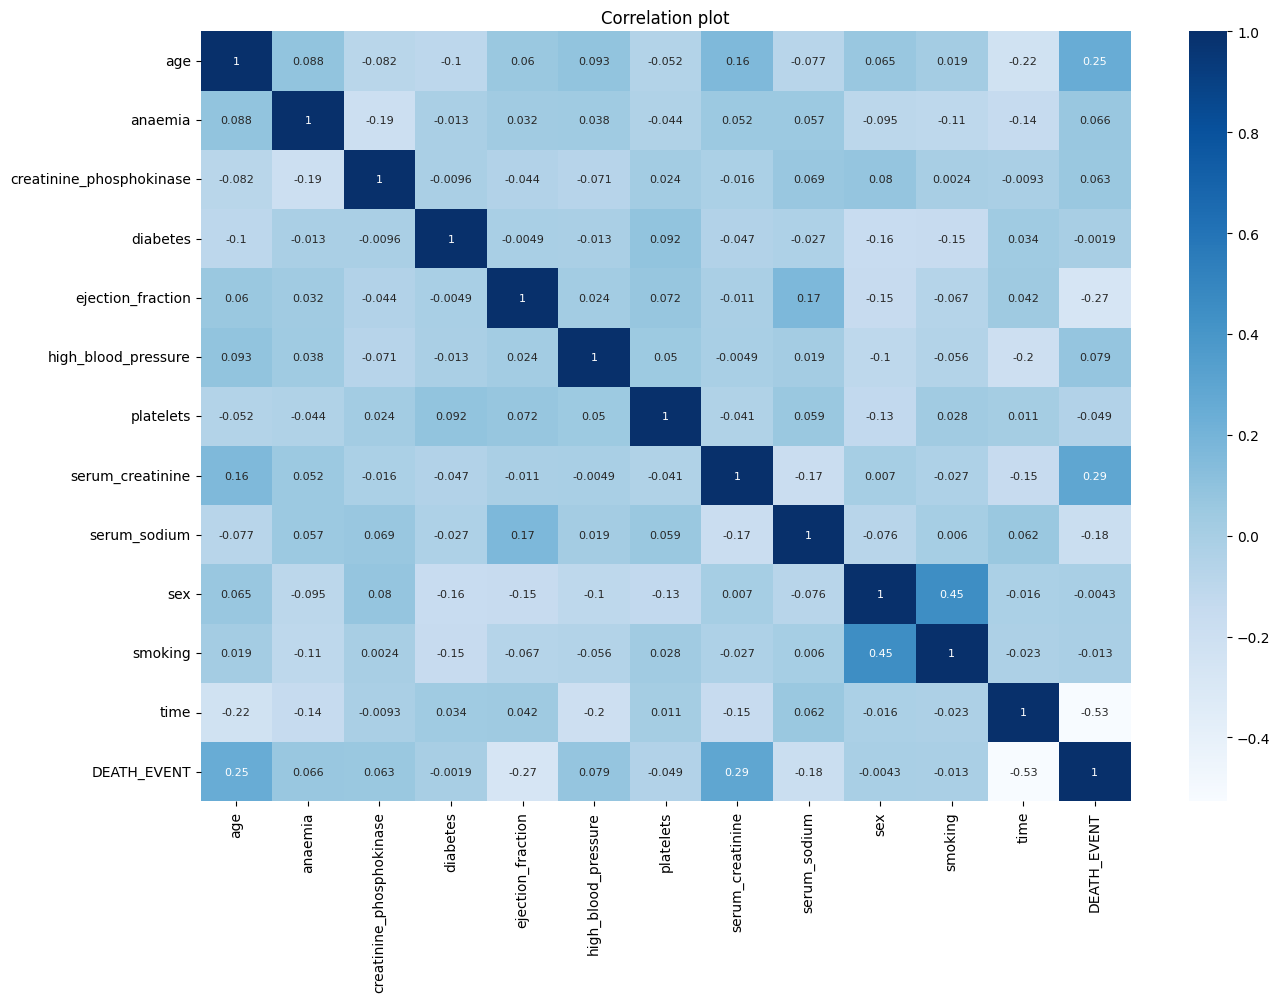

In [345]:
## heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap= "Blues", annot_kws={"size" : 8}) 
plt.title('Correlation plot', loc = "center")
plt.show()

In [346]:
## selecting the dependant and independant variable 
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [347]:
## split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=32)

In [348]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [349]:
""" x, y =make_classification(n_samples= 41, flip_y=0, n_classes =2)
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy = "minority")
x_train, y_train = oversample.fit_resample(x,y)
print(Counter(y_train)) """

' x, y =make_classification(n_samples= 41, flip_y=0, n_classes =2)\nprint(Counter(y))\noversample = RandomOverSampler(sampling_strategy = "minority")\nx_train, y_train = oversample.fit_resample(x,y)\nprint(Counter(y_train)) '

In [350]:
## scaling the data 
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test) 

In [351]:
""" ## normalising the data 
normalizer_x = preprocessing.Normalizer()
x_train = normalizer_x.fit_transform(x_train)
x_test = normalizer_x.transform(x_test)  """ 

' ## normalising the data \nnormalizer_x = preprocessing.Normalizer()\nx_train = normalizer_x.fit_transform(x_train)\nx_test = normalizer_x.transform(x_test)  '

In [352]:
## ANN 

model =  Sequential()
## input layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

## hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
## another layer 
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

## network carefully understands the patterns that exist in your data
## regularization --- help to stop overfitting
model.add(Dropout(0.25))
#
## output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [353]:
## summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                208       
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [354]:
## train our model 
history = model.fit(x_train, y_train, batch_size= 32, epochs= 80, validation_split=0.25)

Epoch 1/80
6/6 [==============================] - 2s 60ms/step - loss: 0.6927 - accuracy: 0.6034 - val_loss: 0.6917 - val_accuracy: 0.7333
Epoch 2/80
6/6 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.6592 - val_loss: 0.6904 - val_accuracy: 0.7333
Epoch 3/80
6/6 [==============================] - 0s 14ms/step - loss: 0.6910 - accuracy: 0.6592 - val_loss: 0.6890 - val_accuracy: 0.7333
Epoch 4/80
6/6 [==============================] - 0s 19ms/step - loss: 0.6900 - accuracy: 0.6592 - val_loss: 0.6876 - val_accuracy: 0.7333
Epoch 5/80
6/6 [==============================] - 0s 17ms/step - loss: 0.6890 - accuracy: 0.6592 - val_loss: 0.6862 - val_accuracy: 0.7333
Epoch 6/80
6/6 [==============================] - 0s 22ms/step - loss: 0.6880 - accuracy: 0.6592 - val_loss: 0.6847 - val_accuracy: 0.7333
Epoch 7/80
6/6 [==============================] - 0s 17ms/step - loss: 0.6869 - accuracy: 0.6592 - val_loss: 0.6831 - val_accuracy: 0.7333
Epoch 8/80
6/6 [===========

In [355]:
## save our model 
model.save("hd_ANN_model")

2023-06-16 14:58:08.096919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]
2023-06-16 14:58:08.370551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: hd_ANN_model/assets


INFO:tensorflow:Assets written to: hd_ANN_model/assets


In [356]:
## load saved model
ANN_model = tf.keras.models.load_model('hd_ANN_model')

In [357]:
y_pred_ann = ANN_model.predict(x_test)
y_pred_ann

2/2 [==============================] - 0s 3ms/step


array([[1.74308568e-01],
       [4.08228971e-02],
       [1.17827505e-02],
       [3.61010849e-01],
       [3.43691289e-01],
       [2.22538523e-02],
       [4.15164530e-01],
       [6.99291180e-04],
       [4.05022874e-02],
       [1.63984597e-01],
       [8.89845192e-02],
       [2.70109326e-01],
       [5.34692466e-01],
       [7.85601079e-01],
       [2.04647809e-01],
       [9.24282596e-02],
       [2.59649247e-01],
       [3.51130441e-02],
       [2.01637015e-01],
       [8.36341828e-02],
       [5.77298820e-01],
       [7.53986061e-01],
       [1.04489014e-01],
       [6.14297017e-02],
       [3.62299860e-01],
       [9.67353508e-02],
       [2.80014724e-02],
       [6.40616477e-01],
       [3.10287058e-01],
       [1.04562432e-01],
       [8.00780773e-01],
       [2.49698069e-02],
       [8.47765744e-01],
       [1.21539846e-01],
       [7.39276409e-01],
       [2.26317104e-02],
       [9.66816209e-03],
       [2.64893118e-02],
       [1.33980550e-02],
       [8.42293739e-01],


In [358]:
## cap the value
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

In [359]:
y_pred_ann

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [361]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



In [362]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[37,  4],
       [ 7, 12]])

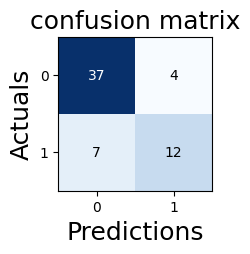

In [366]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(2,2), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

AUC: 0.767009


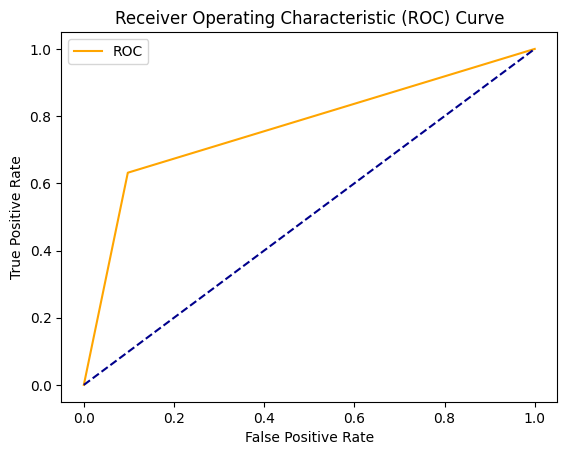

In [365]:
## roc curve
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()